###Divya Bhagat

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Customers=pd.read_csv('Customers.csv')
Customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
Products=pd.read_csv("Products.csv")
Products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
Transactions=pd.read_csv("Transactions.csv")
Transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


##### Customer Segmentation / Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Merge dataframes on CustomerID
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')
customer_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [ ]:
# Feature engineering: Calculate total spend, average spend, transaction frequency
customer_features = customer_transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    avg_spent=('TotalValue', 'mean'),
    transaction_count=('TransactionID', 'count')
).reset_index()
customer_features.head()

,CustomerID,total_spent,avg_spent,transaction_count
0,C0001,3354.52,670.904,5
1,C0002,1862.74,465.685,4
2,C0003,2725.38,681.345,4
3,C0004,5354.88,669.360,8
4,C0005,2034.24,678.080,3


In [ ]:
# Normalize the features (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['total_spent', 'avg_spent', 'transaction_count']])
scaled_features[0]

array([-0.06170143, -0.07026341, -0.01145819])

In [ ]:
# Find the optimal number of clusters (between 2 and 10)
db_indices = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
    db_indices.append(db_index)
db_indices

[1.0072253641525208,
 0.9578205962311451,
 1.060424039992303,
 0.8524813520458038,
 0.8693770662816185,
 0.8553114327404955,
 0.9125320039336968,
 0.8847550123525417,
 0.8630460126564936]

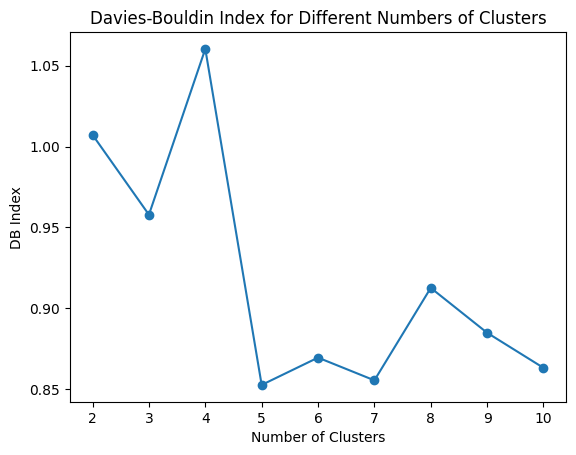

In [ ]:
# Plot DB Index for different cluster numbers
plt.plot(range(2, 11), db_indices, marker='o')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

In [ ]:
# Choose the optimal number of clusters based on the DB Index (lowest DB index)
optimal_clusters = np.argmin(db_indices) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 5


In [ ]:
# Run KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# Add cluster labels to customer data
customer_features['Cluster'] = kmeans.labels_

In [ ]:
# Evaluate clustering results
inertia = kmeans.inertia_  # Within-cluster sum of squares
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Clustering Inertia: {inertia}")
print(f"DB Index: {db_index}")

Clustering Inertia: 150.64411949165748
DB Index: 0.8524813520458038


In [ ]:
# Visualize clusters using PCA (2D projection)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
pca_components[0]

array([-0.0789462, -0.0505591])

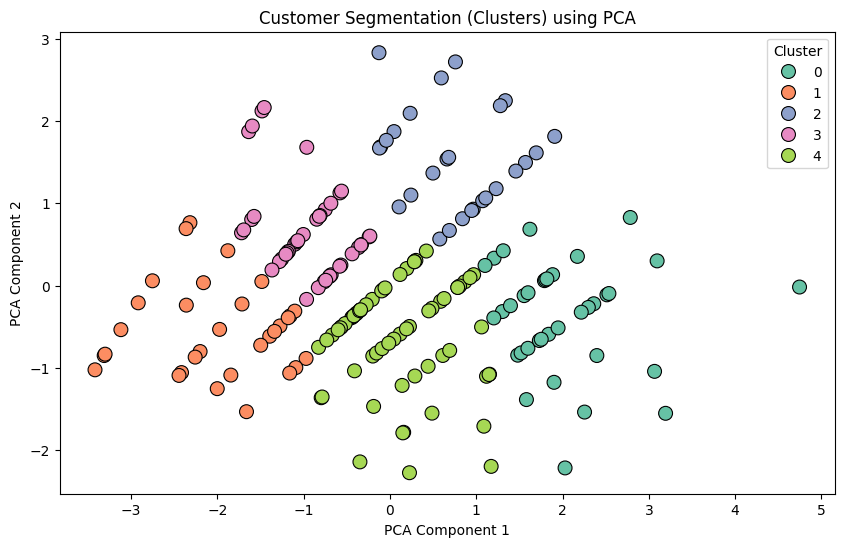

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_features['Cluster'], palette='Set2', s=100, edgecolor='black')
plt.title('Customer Segmentation (Clusters) using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [ ]:
# Save the segmentation result to a CSV (CustomerID and Cluster Label)
customer_features[['CustomerID', 'Cluster']].to_csv('Customer_Segmentation.csv', index=False)

In [ ]:
customer_features.head()

,CustomerID,total_spent,avg_spent,transaction_count,Cluster
0,C0001,3354.52,670.904,5,4
1,C0002,1862.74,465.685,4,1
2,C0003,2725.38,681.345,4,3
3,C0004,5354.88,669.360,8,0
4,C0005,2034.24,678.080,3,3


In [ ]:
print("Clustering results saved to 'Customer_Segmentation.csv'.")

Clustering results saved to 'Customer_Segmentation.csv'.
